#Setup

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 matplotlib==3.5.1 tensorflow-datasets==4.5.2 ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: keras
 

REMEMBER TO restart session

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#Dependencies and dataset

In [2]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist', split = 'train') # specifying that we only want the train partition, pipeline

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIJ0SBH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIJ0SBH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


# Data Viz with Matplot

In [4]:
import numpy as np

iter = ds.as_numpy_iterator()

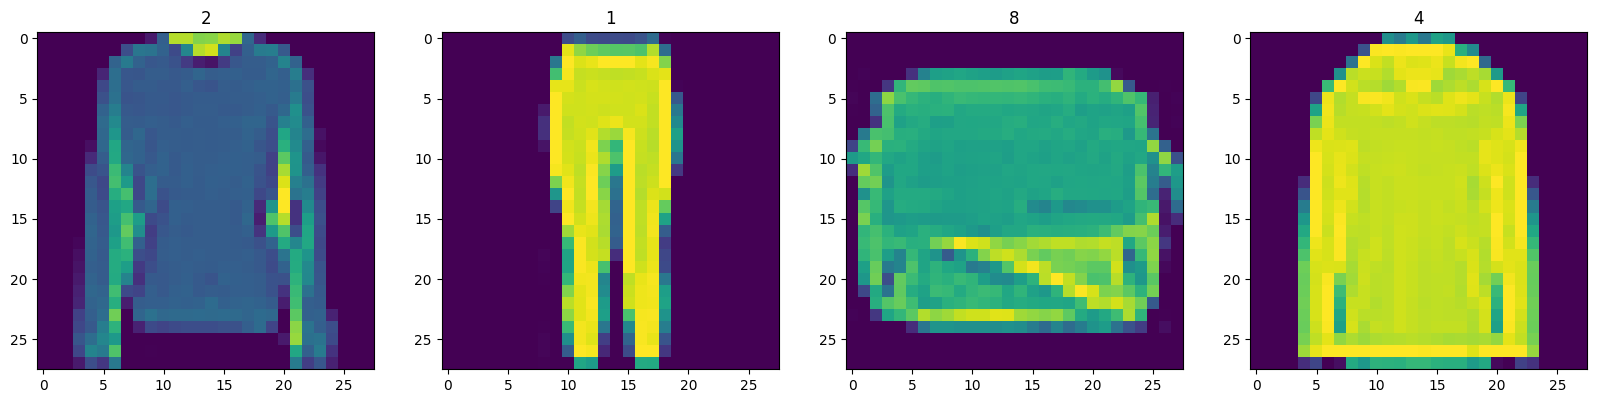

In [5]:
fig, axis = plt.subplots(ncols=4, figsize=(20,20))

for x in range(len(axis)):
  sample = iter.next()
  axis[x].imshow(np.squeeze(sample['image']))
  axis[x].title.set_text(sample['label'])

In [6]:
def scale_images(data):
  image = data['image']
  return image/255 # basically no more color

In [7]:
ds = tfds.load('fashion_mnist', split= 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

#Build Neural Net:
* Discriminator
* Generator

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, LeakyReLU, Reshape, Dropout, UpSampling2D, Flatten

In [9]:
def generator_arch():
  model = Sequential() # Math Formula
  model.add(Dense(7*7*128, input_dim= 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding ="same"))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding ="same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding ="same"))
  model.add(LeakyReLU(0.2))
  model.add(Conv2D(128,4,padding ="same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4, padding="same", activation= "sigmoid"))

  return model

In [10]:
generator = generator_arch()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

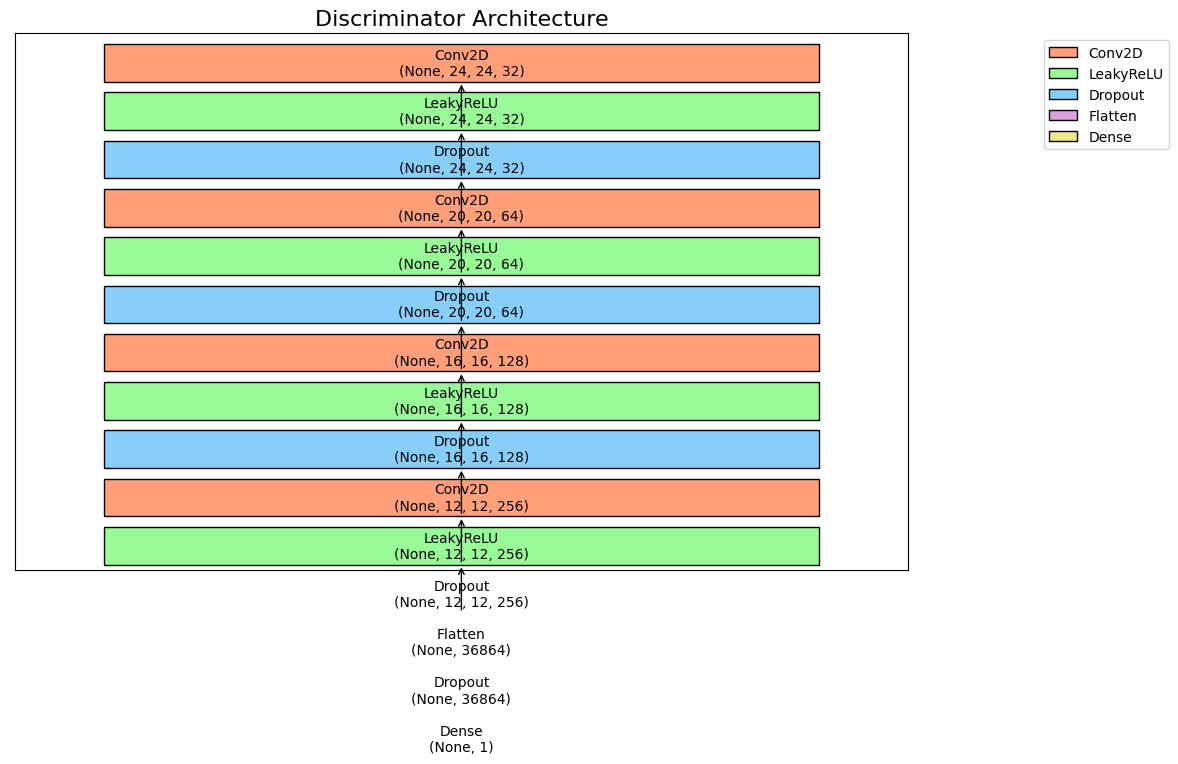

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense

def discriminator_arch():
    model = Sequential()
    model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = discriminator_arch()

fig, ax = plt.subplots(figsize=(12, 8))

colors = {'Conv2D': '#FFA07A', 'LeakyReLU': '#98FB98', 'Dropout': '#87CEFA', 'Flatten': '#DDA0DD', 'Dense': '#F0E68C'}

# Get layer information
layers = [(layer.__class__.__name__, layer.output_shape) for layer in model.layers]

# Plot layers
for i, (layer_type, output_shape) in enumerate(layers):
    color = colors.get(layer_type, '#FFFFFF')
    rect = plt.Rectangle((0.1, 1 - (i + 1) * 0.09), 0.8, 0.07, fill=True, facecolor=color, edgecolor='black')
    ax.add_patch(rect)
    plt.text(0.5, 1 - (i + 1) * 0.09 + 0.035, f"{layer_type}\n{output_shape}", ha='center', va='center')

# Add arrows connecting layers
for i in range(len(layers) - 1):
    ax.annotate('', xy=(0.5, 1 - (i + 1) * 0.09), xytext=(0.5, 1 - (i + 2) * 0.09),
                arrowprops=dict(arrowstyle='->'))

# Set axis limits and remove ticks
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Set title
plt.title('Discriminator Architecture', fontsize=16)

# Add a legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='black', label=layer_type)
                   for layer_type, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
discriminator = discriminator_arch()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)      